In [17]:
import pandas as pd
import plotly.express as px
import json

In [18]:
DATA_PATH = "../../../analysis/data/data.csv"
GEO_DATA_STATES = "us-states.json"
CUSTOM_COLOR_SCALE = [(0, '#8ECAE6'), (0.33, '#219EBC'), (0.66, '#FFB703'), (1, '#FB8500')]
STATE_ABBREV = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'Washington D.C','DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

In [19]:
#Open the aparments csv
df = pd.read_csv(DATA_PATH)

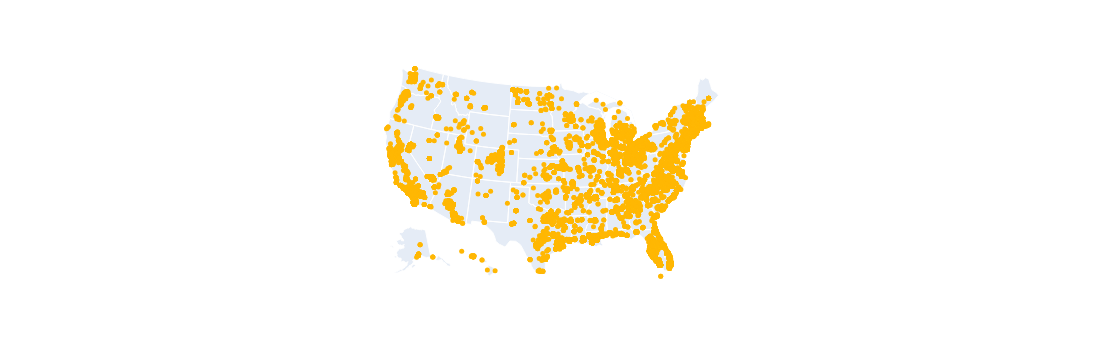

In [20]:
#Print all the aparments location in US map
fig = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    scope='usa'
)

fig.update_traces(marker=dict(color='#FFB703', size=5))

fig.show()

In [21]:
state_average_price = df.groupby("state")["price"].mean()
states_names = pd.Series(state_average_price.index.map(STATE_ABBREV))

In [22]:
states_names, state_average_price = states_names.reset_index(drop = True), state_average_price.reset_index(drop = True)
state_avg_price_df = pd.DataFrame({'state': states_names, 'price': state_average_price})

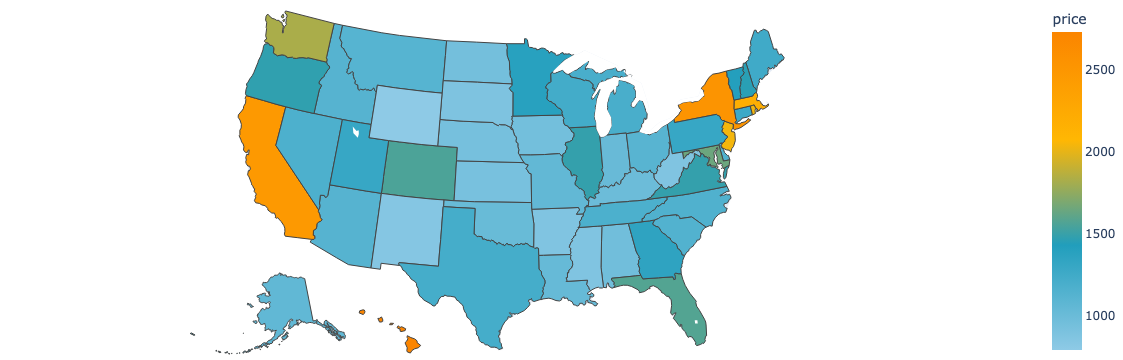

In [23]:
# Open the file and load the GEO data
with open(GEO_DATA_STATES, 'r') as states_json_file:
    states = json.load(states_json_file)

#"Average Apartment Prices by State in the U.S."
fig = px.choropleth(state_avg_price_df, geojson=states,
                    color_continuous_scale=CUSTOM_COLOR_SCALE,
                    locations='state',                
                    featureidkey='properties.name',  
                    color='price',
                    range_color=(state_average_price.min(), state_average_price.max()),
                    scope="usa")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()